In [ ]:
## Load the libraries

import pandas as pd
import seaborn as sns

## Load the Dataset
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


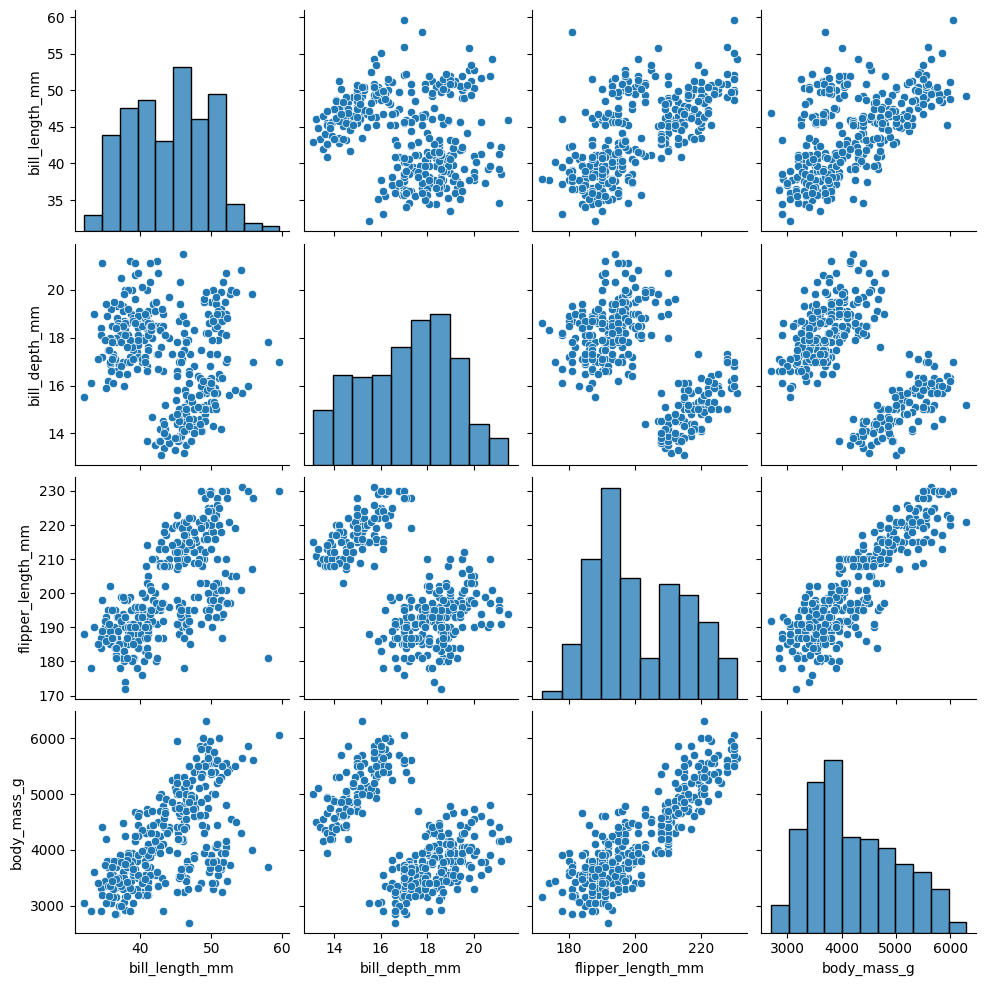

In [ ]:
## Perform EDA
penguins_sub=penguins[penguins["species"]!="chinstrap"]
penguins_final=penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)
sns.pairplot(penguins_final)

In [ ]:
## Load and train the linear regression model using the OLS method
ols_data=penguins_final[["flipper_length_mm","body_mass_g"]]
ols_formula= "body_mass_g ~ flipper_length_mm"
from statsmodels.formula.api import ols
ols_model=ols(formula=ols_formula, data=ols_data)
result=ols_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          3.13e-105
Time:                        10:39:40   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

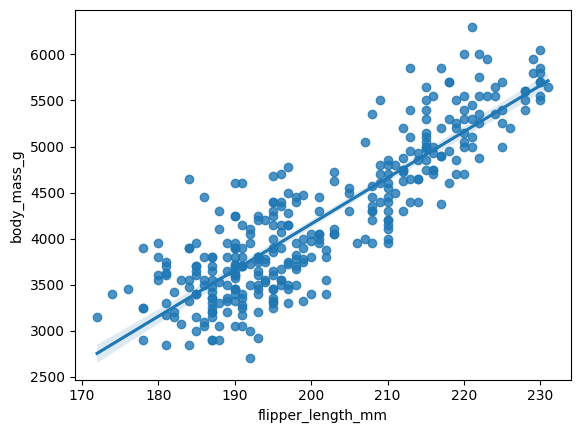

In [ ]:
## Model Evaluation - Check for Linearity
sns.regplot(x="flipper_length_mm",y="body_mass_g", data=ols_data)

In [ ]:
x = ols_data['flipper_length_mm']
fitted_values=result.predict(x)

In [ ]:
residuals=result.resid

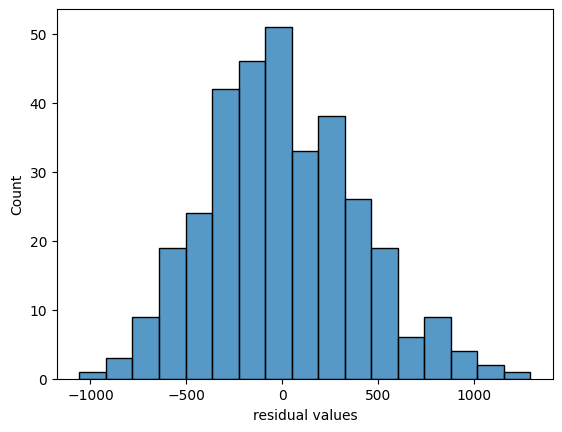

In [ ]:
## Model Evaluation - Check for normality
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("residual values")
plt.show()


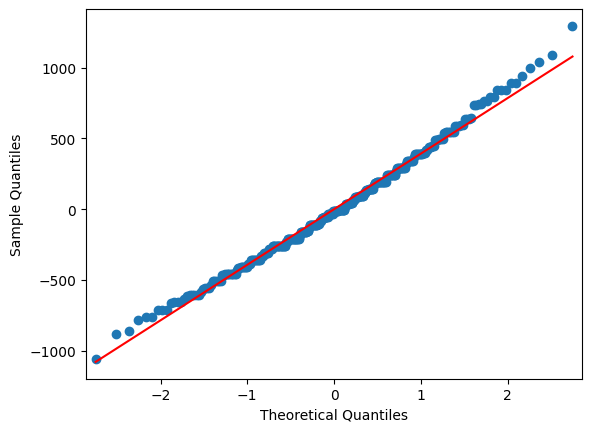

In [ ]:
## Model Evaluation - Check for independant observations
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(result.resid, line = 's')
plt.show()